# spectra letg hrc-s


In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
download_chandra_obsid 29 evt1,flt,asol
mv -fv 29/*/*fits.gz .
gunzip -f *.fits.gz
rmdir 29/*
rmdir 29


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      312 Mb  ####################            3 s  91969.8 kb/s
  asol     fits       20 Mb  ####################          < 1 s  87669.0 kb/s
  flt      fits        3 Kb  ####################          < 1 s  288.7 kb/s

      Total download size for ObsId 29 = 332 Mb
      Total download time for ObsId 29 = 4 s

'29/primary/pcadf062419415N004_asol1.fits.gz' -> './pcadf062419415N004_asol1.fits.gz'
'29/secondary/hrcf00029_000N005_evt1.fits.gz' -> './hrcf00029_000N005_evt1.fits.gz'
'29/secondary/hrcf00029_000N005_std_flt1.fits.gz' -> './hrcf00029_000N005_std_flt1.fits.gz'


## L1.5

### detect

In [3]:
pset tgdetect infile=hrcf00029_000N005_evt1.fits
pset tgdetect outfile=hrc_29_evt1_src1a.fits
pset tgdetect fixedcell=6
pset tgdetect snr_thresh=20
pset tgdetect snr_ratio_limit=0.25
tgdetect mode=h clobber=yes


[1] 23210
[1]+  Done                    ds9 hrcf00029_000N005_evt1.fits -scale log -zoom 2 -pan to $x $y physical -region hrc_29_evt1_src1a.fits -saveimage png ds9_01.png


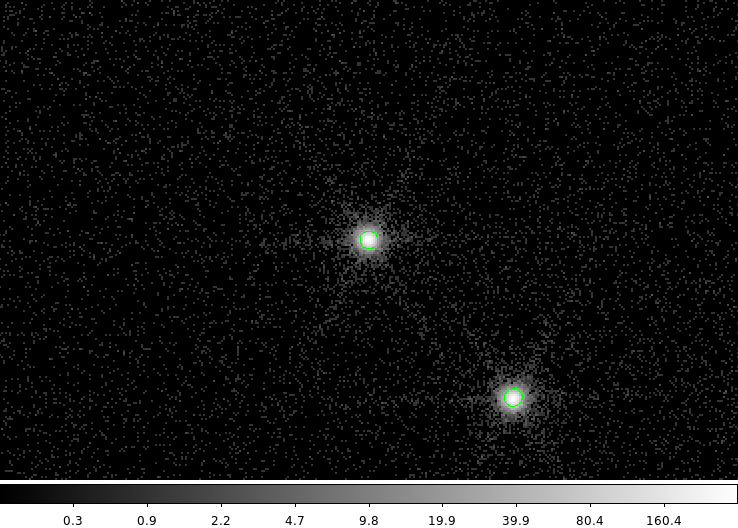

In [4]:
x=`dmkeypar hrc_29_evt1_src1a.fits x echo+`
y=`dmkeypar hrc_29_evt1_src1a.fits y echo+`


ds9 hrcf00029_000N005_evt1.fits  -scale log -zoom 2\
  -pan to $x $y physical \
  -region hrc_29_evt1_src1a.fits \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

### tg mask

In [5]:
pset tg_create_mask infile=hrcf00029_000N005_evt1.fits
pset tg_create_mask outfile=hrc_29_evt1_L1a.fits
pset tg_create_mask input_pos_tab=hrc_29_evt1_src1a.fits
tg_create_mask mode=h clob+


[1] 23273
[1]+  Done                    ds9 hrcf00029_000N005_evt1.fits -bin factor 32 -scale log -region hrc_29_evt1_L1a.fits -saveimage png ds9_02.png


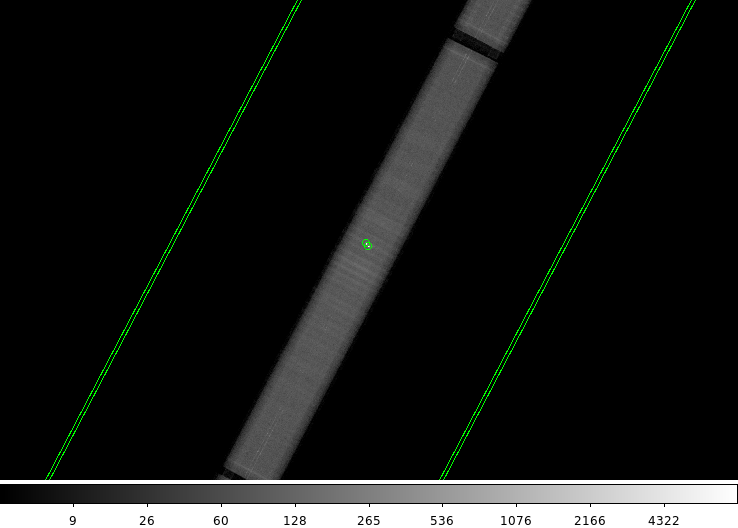

In [6]:
ds9 hrcf00029_000N005_evt1.fits  -bin factor 32 -scale log \
  -region hrc_29_evt1_L1a.fits \
  -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit

display < ds9_02.png

In [7]:
/bin/ls -1 pcadf* > pcad.lis
pset tg_resolve_events infile=hrcf00029_000N005_evt1.fits
pset tg_resolve_events outfile=hrc_29_evt1a.fits
pset tg_resolve_events regionfile=hrc_29_evt1_L1a.fits
pset tg_resolve_events acaofffile=@pcad.lis
pset tg_resolve_events eventdef=")stdlev1_HRC"
pset tg_resolve_events osipfile=none
tg_resolve_events mo=h cl+

## Create L2

### bow tie

In [8]:
 dmcopy \
      "hrc_29_evt1a.fits[EVENTS][(tg_mlam,pi)=region($CALDB/data/chandra/hrc/tgpimask2/letgD1999-07-22pireg_tgmap_N0001.fits)]" \
      hrc_29_back_evt1a.fits opt=all clob+


### status

In [9]:
 dmcopy "hrc_29_evt1a.fits[status=xxxxxx00xxxx0xxx00000000x0000000]" \
      hrc_29_flt1_evt1a.fits opt=all clob+


### gti

In [10]:
dmcopy \
      "hrc_29_flt1_evt1a.fits[EVENTS][@hrcf00029_000N005_std_flt1.fits]" \
      hrc_29_evt2.fits opt="" clob+


In [11]:
 dmappend \
      "hrc_29_flt1_evt1a.fits[region][subspace -time]" \
      hrc_29_evt2.fits

## Extract spectrum

In [12]:
pset tgextract infile=hrc_29_evt2.fits
pset tgextract outfile=hrc_29_pha2.fits
tgextract mode=h clob+


In [13]:
dmlist hrc_29_pha2.fits blocks

 
--------------------------------------------------------------------------------
Dataset: hrc_29_pha2.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: SPECTRUM                       Table        13 cols x 4        rows
Block    3: REGION                         Table        10 cols x 12       rows


In [14]:
dmlist hrc_29_pha2.fits cols

 
--------------------------------------------------------------------------------
Columns for Table Block SPECTRUM
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range            Null
   1   SPEC_NUM                          Int2           1:32767              -          Spectrum Number
   2   TG_M                              Int2           -62:62               99         Diffraction order (m)
   3   TG_PART                           Int2           0:99                 -          Spectral component (HEG, MEG, LEG, HESF parts)
   4   TG_SRCID                          Int2           1:32767              -          Source ID, output by detect
   5   X                    pixel        Real4          0.50:    65534.50    -          X sky coord of source
   6   Y                    pixel        Real4          0.50:    65534.50    -          Y sky coord of source
   7   CHANNEL[16384]                

# Cleanup


In [15]:
/bin/rm -f hrcf* pcadf*
